In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-black-friday-sales/datasets/walmart_data.csv


# Take Home Interview Assignment for Data Scientist Position at Walmart
#### The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

## Reading the dataset

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scipy.stats as stats
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

## Data Overview

In [ ]:
df= pd.read_csv("/kaggle/input/walmart-black-friday-sales/datasets/walmart_data.csv")

In [ ]:
df.head()

We'll also see how many rows and columns are there, what types of data we have, and what each column is called.



In [ ]:
df.shape

In [ ]:
df.info()

## Finding Unique Values and Count Them
Next, we'll find out the unique values in each column. This will help us understand how varied the data is.

In [ ]:
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"\nUnique Values of {column}: ", unique_values)

# Example usage
print_unique_values(df)

We'll also count how many unique values there are in each column.

In [ ]:
def print_nunique_values(df):
    for column in df.columns:
        unique_values = df[column].nunique()
        print(f"\nUnique Values of {column}: ", unique_values)

# Example usage
print_nunique_values(df)

## Data Cleaning 

We'll make some changes to the data for better analysis. For example, we'll adjust the 'Stay_In_Current_City_Years' column by removing the '+' symbol and converting it to a numeric format. But first, let's look the unique values.



In [ ]:
df.Stay_In_Current_City_Years.unique()

In [ ]:
# Removing "+" symbol
df.Stay_In_Current_City_Years=df.Stay_In_Current_City_Years.str.replace("+","")

In [ ]:
# Coverting the data type of the feature to numeric data type
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'])


## Statistical Summary 
Here, we'll look at some statistics of the data. This includes things like mean, standard deviation, minimum, and maximum values. It will give us a good idea of the overall distribution and range of the data. But before of course, we are going to select data types that is numerical.



In [ ]:
df.select_dtypes(include=['int64']).skew()

In [ ]:
df.describe(include='all')

We'll share some key observations from the analysis. This could include things like which age group buys the most, which city has the most sales, etc.

###  Obervations from the Analysis: 
- There are no missing values in the data.
- Customers with age group of 26-35 have done more purchases (2,19,587) compared with others
- Customers in City_Category of B have done more purchases (2,31,173) compared with other City_Category
- Out of 5,50,000 data point. 4,14,259's gender is Male and rest are the Female.
- Customer with Minimum amount of Purchase is 12 dollars.
- Customer with Maximum amount of Purchase is 23961 dollars.
- Purchase might have outliers


## Missing Values :
We'll check if there are any missing values in the data. Missing values can affect the analysis, so it's important to know if there are any. So Let's check the missing values in our dataset.

In [ ]:
# checking for missing values in the dataset
df.isnull().sum()

## Duplicate Values :
We'll also look for any duplicate entries in the data. Duplicates can skew our analysis, so we need to identify and handle them.

In [ ]:
# checking for duplicate values in the dataset
df.duplicated(subset=None).sum()

## Data Visualization
We check the dataset structure again.

In [ ]:
df.info()

## Data Visualization with numerical features
In this part, we'll create visual representations of the numerical data. This will include graphs showing distributions of various numerical features like occupation, years in the current city, marital status, and purchase amounts. Graphs help us see patterns and trends more easily than looking at numbers alone.

In [ ]:
[col for col in df.select_dtypes(include=['int64']).columns]

Two Features 'User_ID' & 'Product_Category' willl not be very helpful in the analysis process.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create a 2x2 grid of subplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=0.9)  # Adjust the top spacing of the subplots

# Plot distribution plots for each specified column
sns.distplot(df['Occupation'], kde=True, ax=axis[0,0], color="#900000")
sns.distplot(df['Stay_In_Current_City_Years'].astype(int), kde=True, ax=axis[0,1], color="#900000")
sns.distplot(df['Marital_Status'], kde=True, ax=axis[1,0], color="#900000")

# Plotting a distribution plot for the 'Purchase' variable with normal curve fit
sns.distplot(df['Purchase'], ax=axis[1,1], color="#900000", fit=norm)

# Fitting the target variable to the normal curve 
mu, sigma = norm.fit(df['Purchase']) 
print("The mu (mean) is {} and sigma (standard deviation) is {} for the curve".format(mu, sigma))

# Adding a legend for the 'Purchase' distribution plot
axis[1,1].legend(['Normal Distribution (μ = {:.2f}, σ = {:.2f})'.format(mu, sigma)], loc='best')

# Show the plots
plt.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=("Gender", "Age", "Occupation", "City Category",
                    "Stay In Current City Years", "Marital Status", "Product Category", "Purchase")
)

# Add histograms for each subplot
fig.add_trace(go.Histogram(x=df['Gender']), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Age']), row=1, col=2)
fig.add_trace(go.Histogram(x=df['Occupation']), row=2, col=1)
fig.add_trace(go.Histogram(x=df['City_Category']), row=2, col=2)
fig.add_trace(go.Histogram(x=df['Stay_In_Current_City_Years']), row=3, col=1)
fig.add_trace(go.Histogram(x=df['Marital_Status']), row=3, col=2)
fig.add_trace(go.Histogram(x=df['Product_Category']), row=4, col=1)
fig.add_trace(go.Histogram(x=df['Purchase']), row=4, col=2)

# Update layout if needed
fig.update_layout(height=1200, width=1000, title_text="Count Plots")
fig.update_layout(showlegend=False)  # Hide the legend if not needed

# Show the figure
fig.show()


## Observation from the charts 
- Many buyers are male while the minority are female. Difference is due to the categories on sale during Black Friday, evaluating a particular category may change the count between genders.

- There are 7 categories defined to classify the age of the buyers

- Majority of the buyers are single

- Display of the occupation of the buyers. Occupation 8 has extremely low count compared with the others; it can be ignored for the calculation since it won't affect much the result.

- Majority of the products are in category 1, 5 and 8. The low number categories can be combined into a single category to greatly reduce the complexity of the problem.

- Higher count might represent the urban area indicates more population in City_Category.

- Most buyers have one year living in the city. Remaining categories are in uniform distribution.

## Data Visualization with Categorical Features
Here, we'll focus on the categorical data, like gender, age, and city category. We'll use different types of charts to show how these categories relate to purchases. This will help us understand which categories have the most impact on purchasing behavior.

## Outliers Detection 

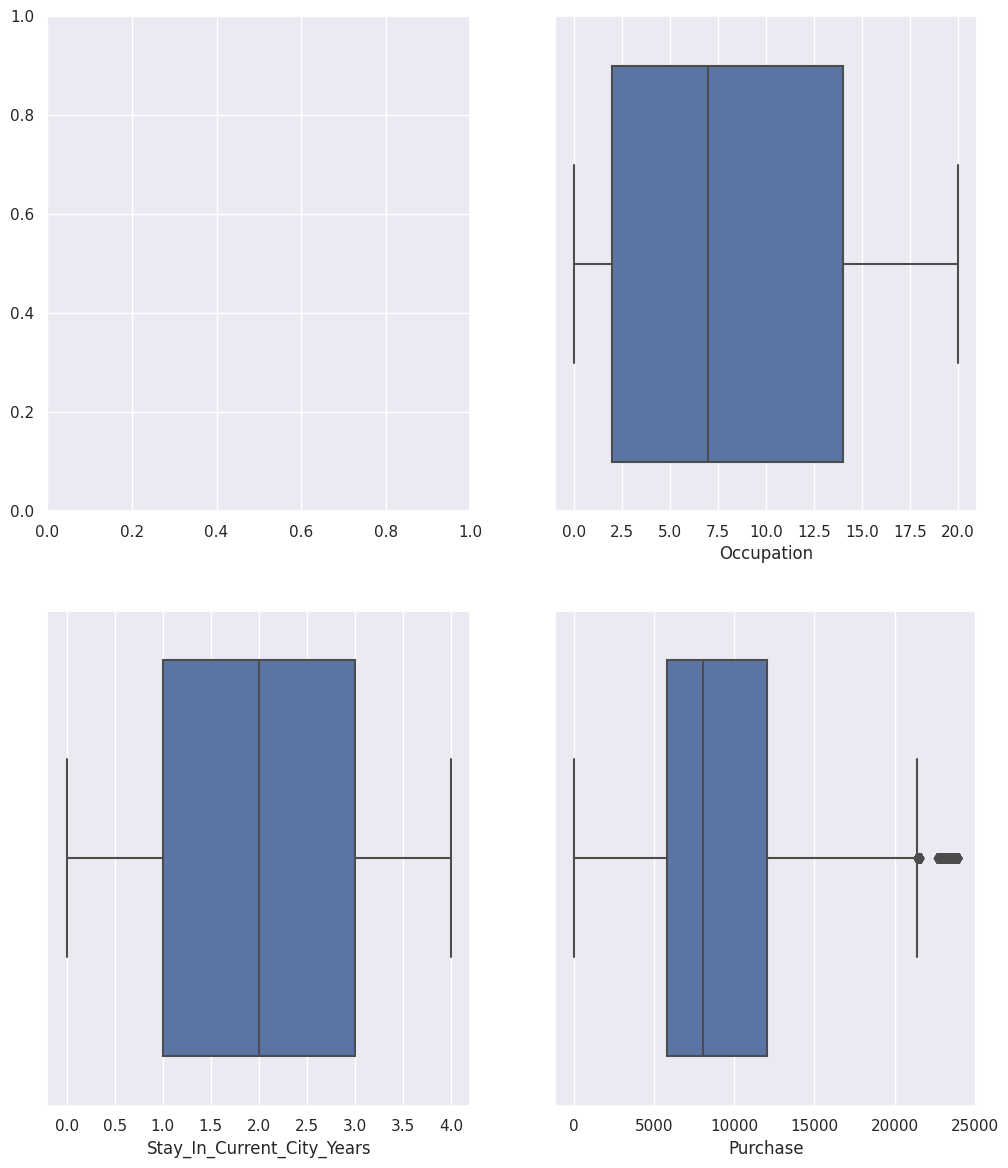

In [103]:
fig, axis= plt.subplots(nrows=2,ncols=2, figsize=(12,10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x= 'Occupation', ax=axis[0,1])
sns.boxplot(data=df, x='Stay_In_Current_City_Years', ax=axis[1,0])
sns.boxplot(data=df,x='Purchase')

plt.show()

## Purchasess & other Features

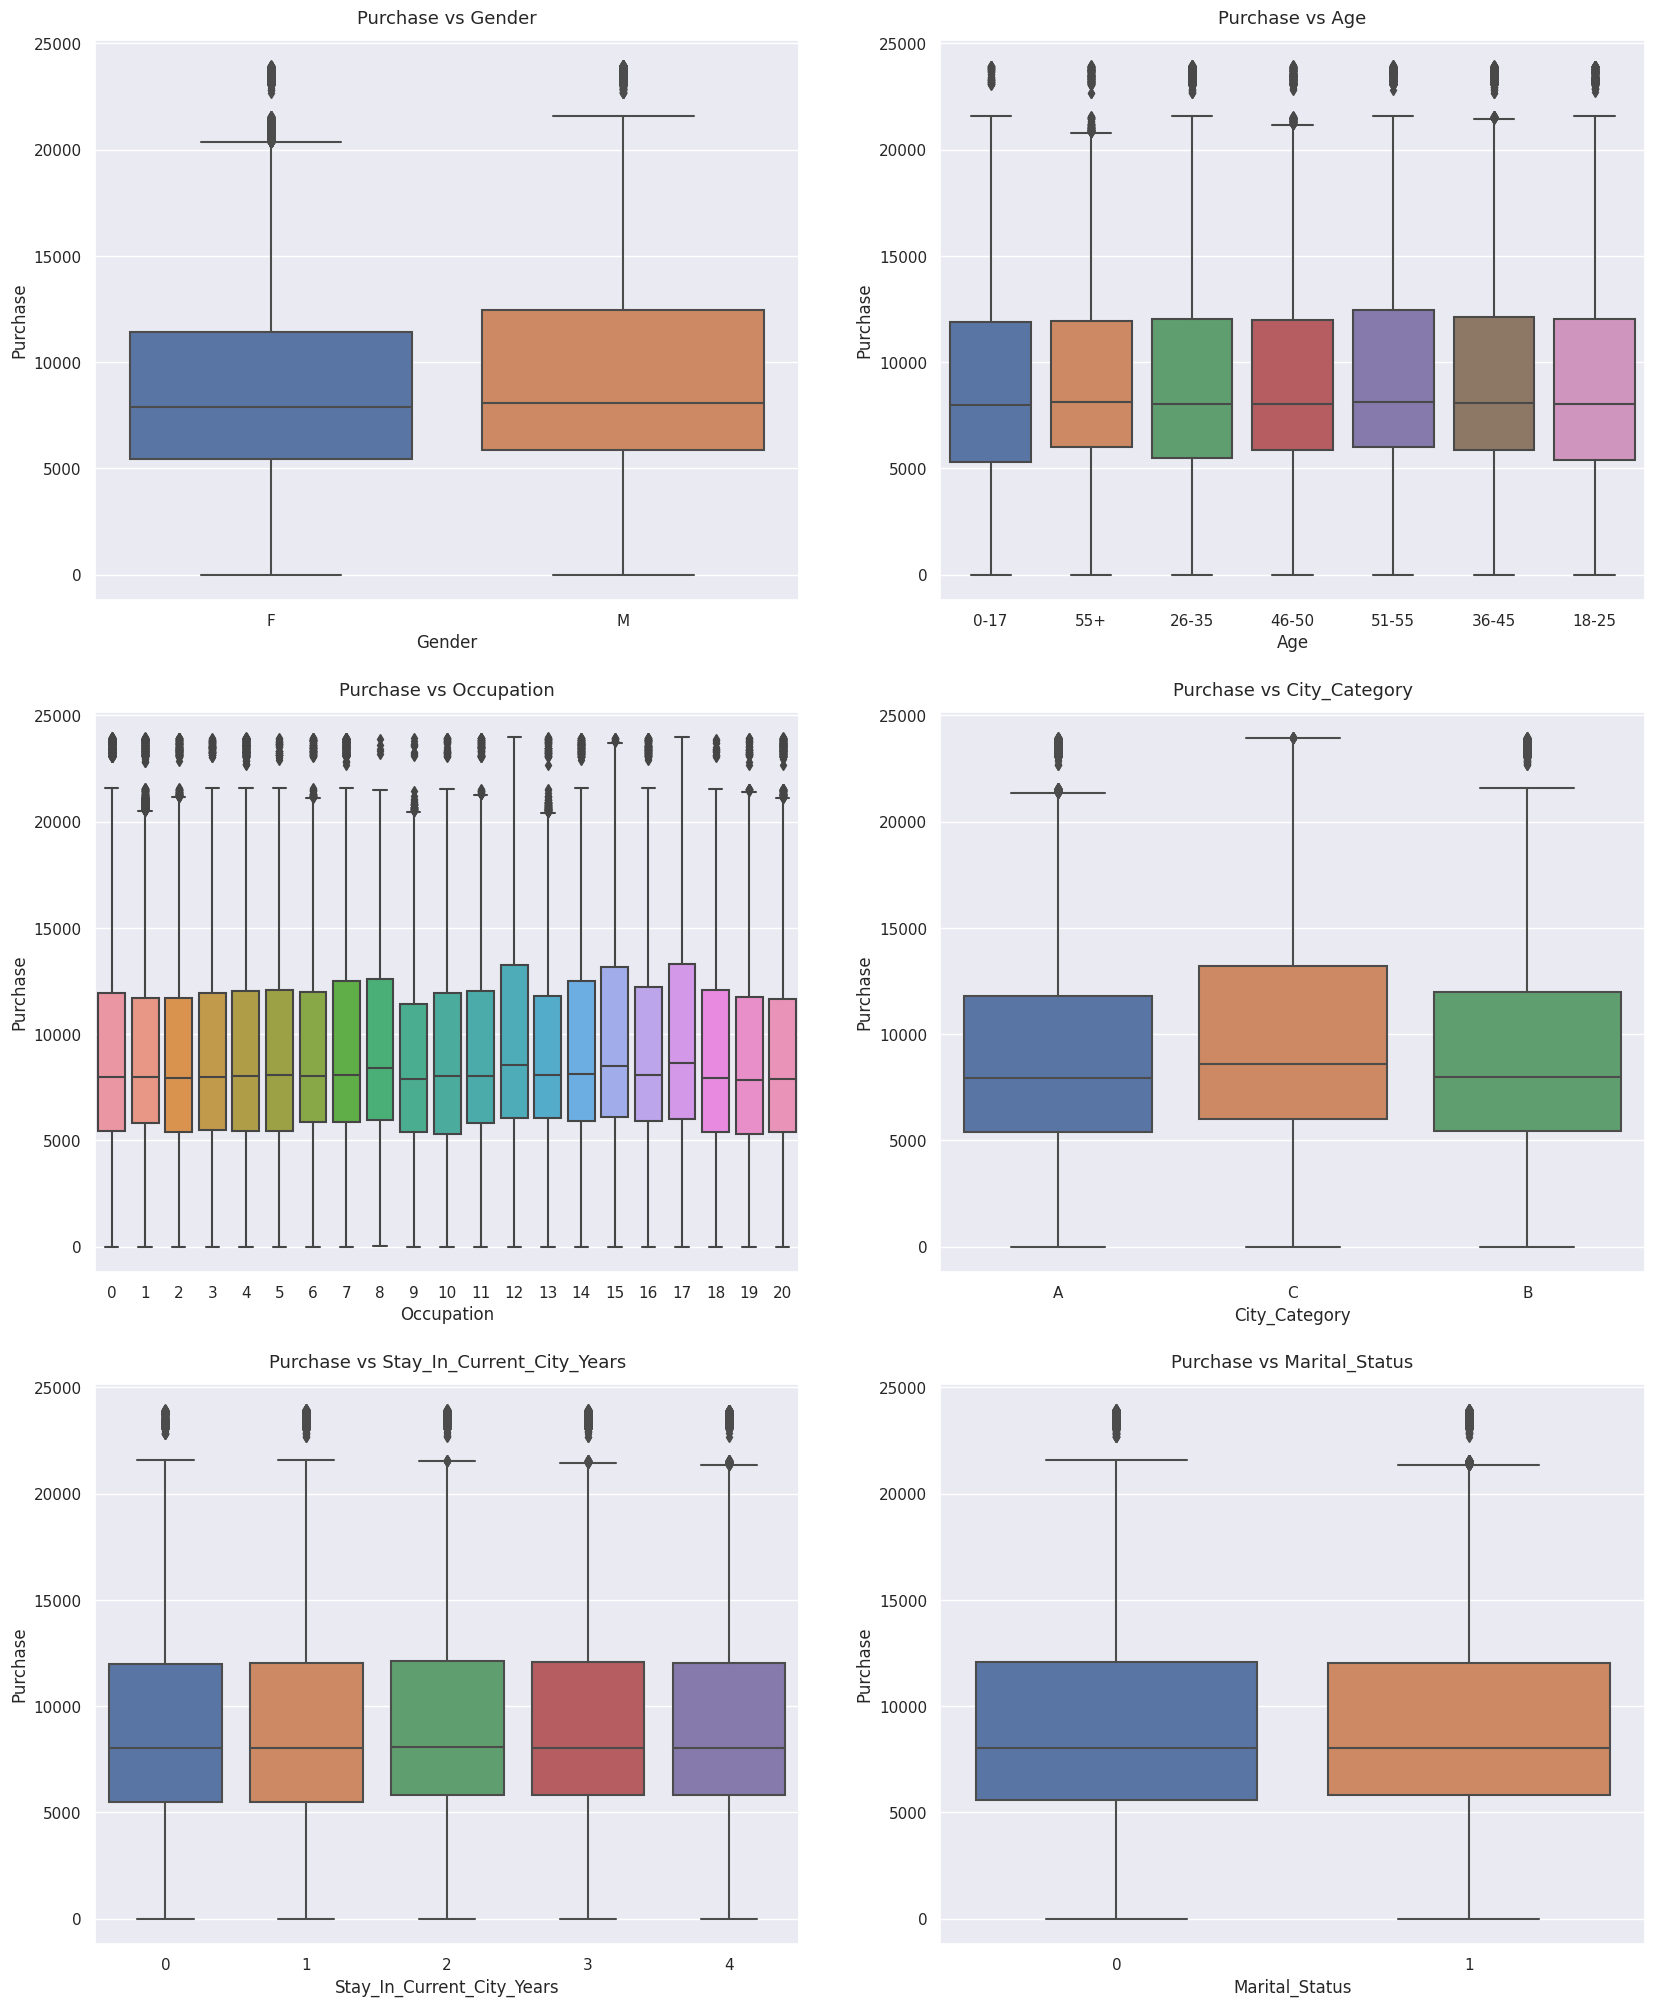

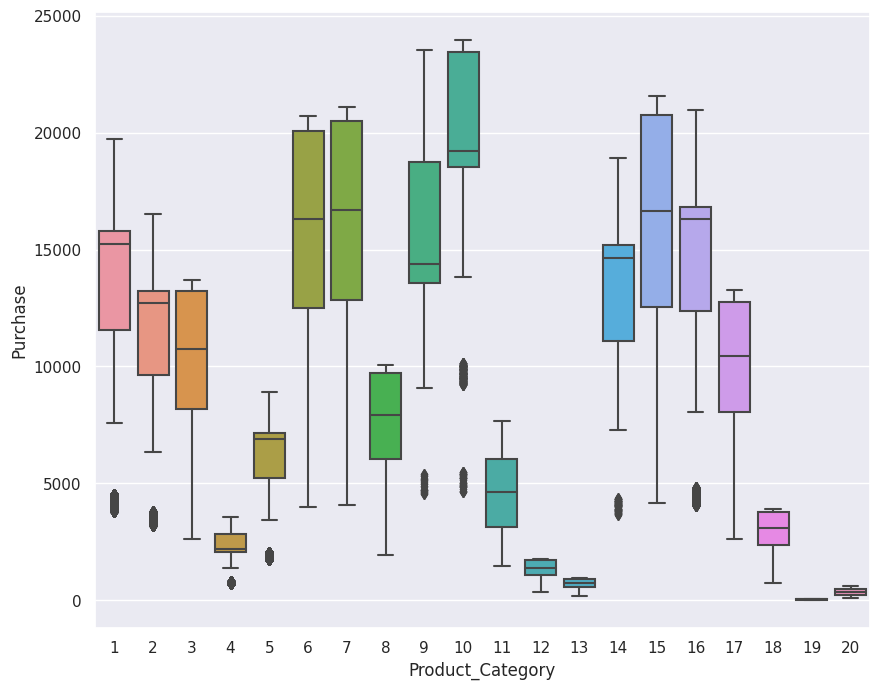

In [104]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col])
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1])
plt.show()

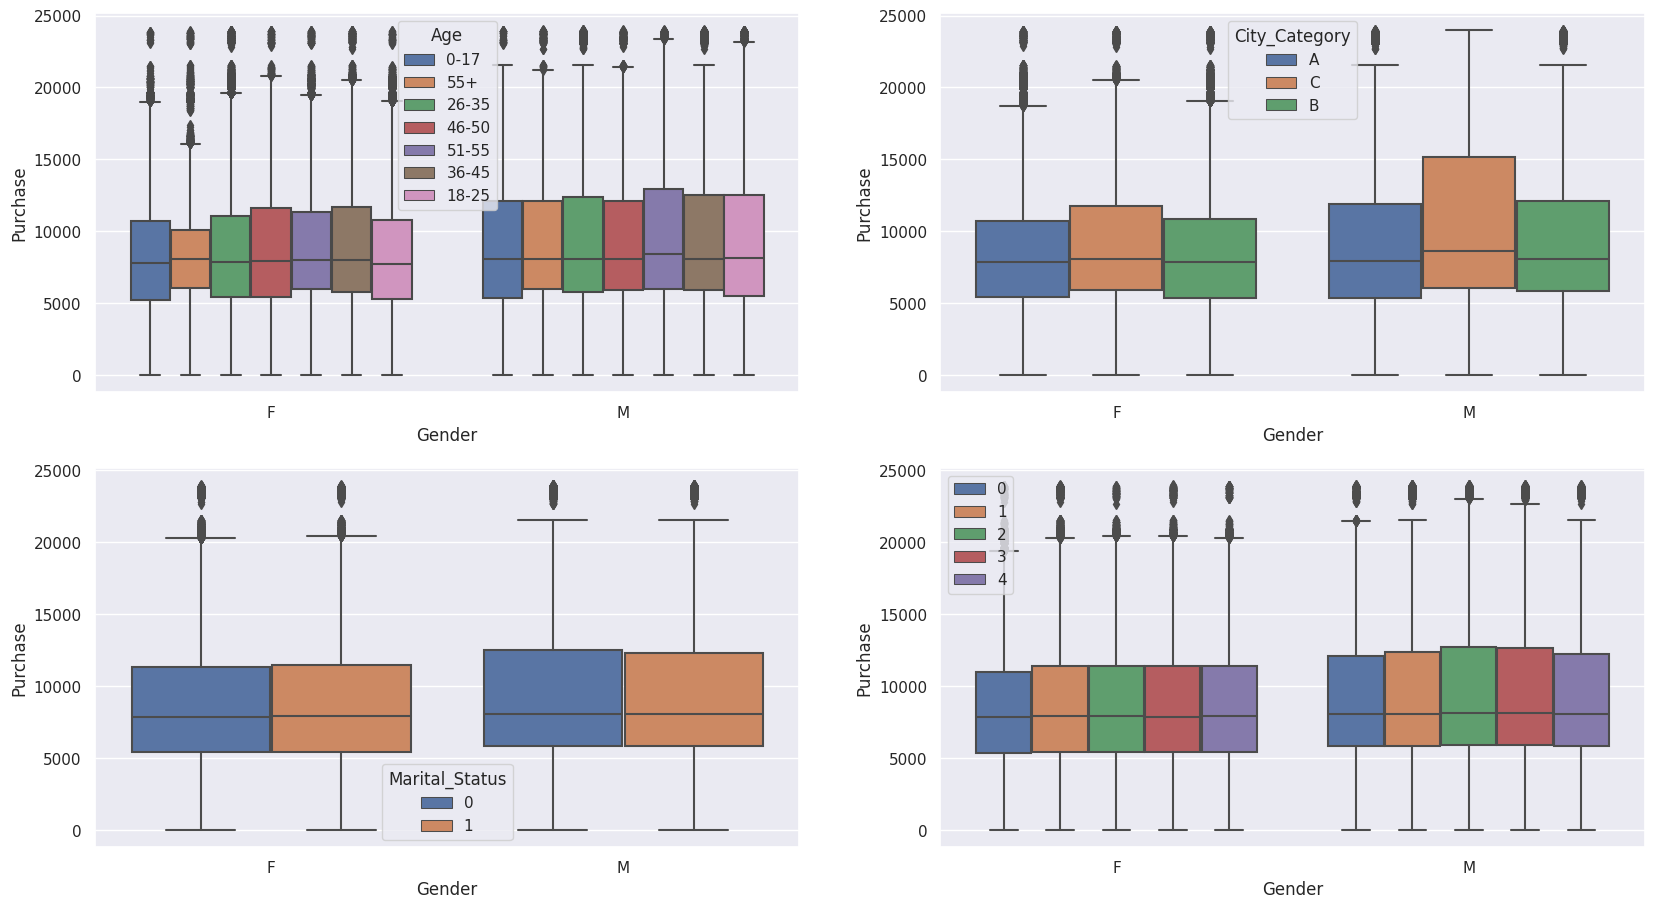

In [105]:
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))

fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

## Analysis 
Are women spending more money per transaction than men? Why or Why not?

In [106]:
# Average amount spend per customer for Male and Female
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
avg_amt_df = amt_df.reset_index()
avg_amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [107]:
# Gender wise value counts in avg_amt_df
avg_amt_df['Gender'].value_counts()

Gender
M    4225
F    1666
Name: count, dtype: int64

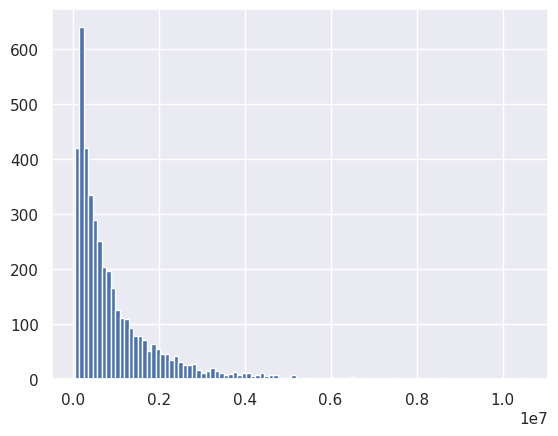

In [108]:
# histogram of average amount spend for each customer - Male
avg_amt_df[avg_amt_df['Gender']=='M']['Purchase'].hist(bins=100)
plt.show()

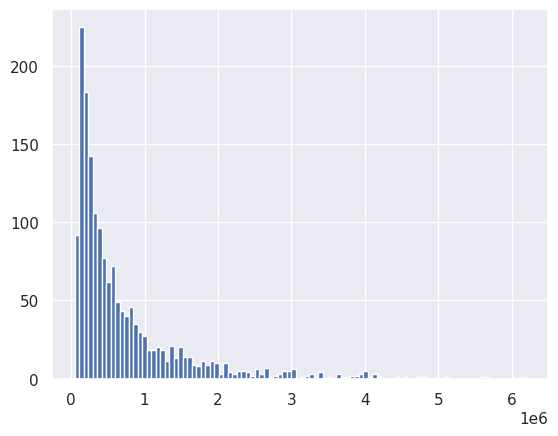

In [109]:
# histogram of average amount spend for each customer - Female
avg_amt_df[avg_amt_df['Gender']=='F']['Purchase'].hist(bins=100)
plt.show()

In [110]:
male_avg = avg_amt_df[avg_amt_df['Gender']=='M']['Purchase'].mean()
female_avg = avg_amt_df[avg_amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


## Final Insights:
After analyzing the data, we have gathered key insights about customer spending patterns based on age, gender, marital status, city category, and product categories.

## Actionable Insights 
- For Age feature, we observed that ~ 80% of the customer's who belong to the age group 25-40 (40%: 26-35, 18%: 18-25, 20%: 36-45) tend to spend the most.
- For Gender feature, ~75% of the number of purchases are made by Male customer's and rest of the 25% is done by female customer's. This tells us the Male consumers are the major contributors to the number of sales for the retail store.On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.

    - Average amount spend by Male customers: 9,25,408.28
    - Average amount spend by Female customers: 7,12,217.18

## Recommendations

1. Men spent more money than women, So company should focus on retaining the female customers and getting more female customers.

2. Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.

3. Customers in the age 25-40 spend more money than the others, So company should focus on acquisition of customers of other age groups.